In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from keras.datasets import mnist
# load_data -> ((訓練題目, 訓練答案), (測試題目, 測試答案))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print("訓練維度:", x_train.shape)
print("測試維度:", x_test.shape)

訓練維度: (60000, 28, 28)
測試維度: (10000, 28, 28)


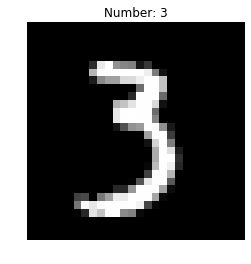

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.title("Number: " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [26]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,45,232,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,182,253,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,28,136,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# 預處理
# 圖片特徵(題目) 0~1, 如果要in MLP->攤平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# 答案處理 -> One-Hot Encoding
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
print("答案:", y_train[1])
print("One-Hot:", y_train_cat[1])

答案: 0
One-Hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層: 輸入多大帶入
mlp.add(Dense(input_dim=784, units=128, activation="relu"))
mlp.add(Dense(units=10, activation="softmax"))
mlp.summary()
# 1290: 128 * 10 (全連接) + 10(bias)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 確定訓練方式還有Loss計算
# 最後輸出一個: binary_crossentropy 最後輸出多個: categorical_crossentropy
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# epochs: 整份資料看幾次(10->60000 * 10 = 600000) -> 調整來避免過擬合
# batch: 看幾次一次梯度更新
# ?次: 600000/200 = 3000
# verbose: 打印log的詳細程度
history = mlp.fit(x_train_shape, 
                    y_train_cat, 
                    batch_size=200, 
                    epochs=15, 
                    validation_split=0.1, 
                    verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4399 - acc: 0.8826 - val_loss: 0.1924 - val_acc: 0.9517
Epoch 2/15
 - 1s - loss: 0.2026 - acc: 0.9430 - val_loss: 0.1413 - val_acc: 0.9600
Epoch 3/15
 - 1s - loss: 0.1524 - acc: 0.9563 - val_loss: 0.1180 - val_acc: 0.9672
Epoch 4/15
 - 1s - loss: 0.1218 - acc: 0.9649 - val_loss: 0.1046 - val_acc: 0.9687
Epoch 5/15
 - 1s - loss: 0.1001 - acc: 0.9717 - val_loss: 0.0925 - val_acc: 0.9740
Epoch 6/15
 - 1s - loss: 0.0848 - acc: 0.9759 - val_loss: 0.0834 - val_acc: 0.9758
Epoch 7/15
 - 1s - loss: 0.0725 - acc: 0.9791 - val_loss: 0.0825 - val_acc: 0.9760
Epoch 8/15
 - 1s - loss: 0.0629 - acc: 0.9820 - val_loss: 0.0761 - val_acc: 0.9767
Epoch 9/15
 - 1s - loss: 0.0542 - acc: 0.9846 - val_loss: 0.0740 - val_acc: 0.9782
Epoch 10/15
 - 1s - loss: 0.0465 - acc: 0.9875 - val_loss: 0.0745 - val_acc: 0.9762
Epoch 11/15
 - 1s - loss: 0.0409 - acc: 0.9889 - val_loss: 0.0728 - val_acc: 0.9768
Epoch 12/15
 - 1s - loss: 0.0351 - a

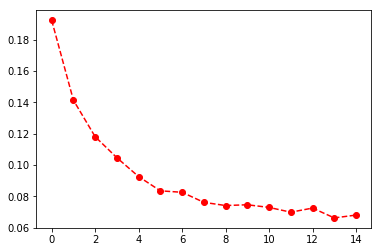

In [49]:
plt.plot(history.history["val_loss"], "ro--")

In [51]:
# evaluate -> predict -> 算metrics
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 25us/step


[0.07531721816014032, 0.9789]

In [52]:
pre = mlp.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,964,0,2,0,1,2,5,1,3,2
1,0,1123,3,1,0,1,2,0,5,0
2,3,1,1000,4,2,0,2,7,11,2
3,0,0,2,986,0,6,1,4,2,9
4,0,0,2,0,964,0,6,2,2,6
5,3,0,0,4,0,872,5,1,2,5
6,4,2,1,1,3,4,942,0,1,0
7,1,4,7,3,0,0,0,1007,1,5
8,1,0,2,6,2,4,3,2,948,6
9,1,2,0,4,11,1,0,6,1,983


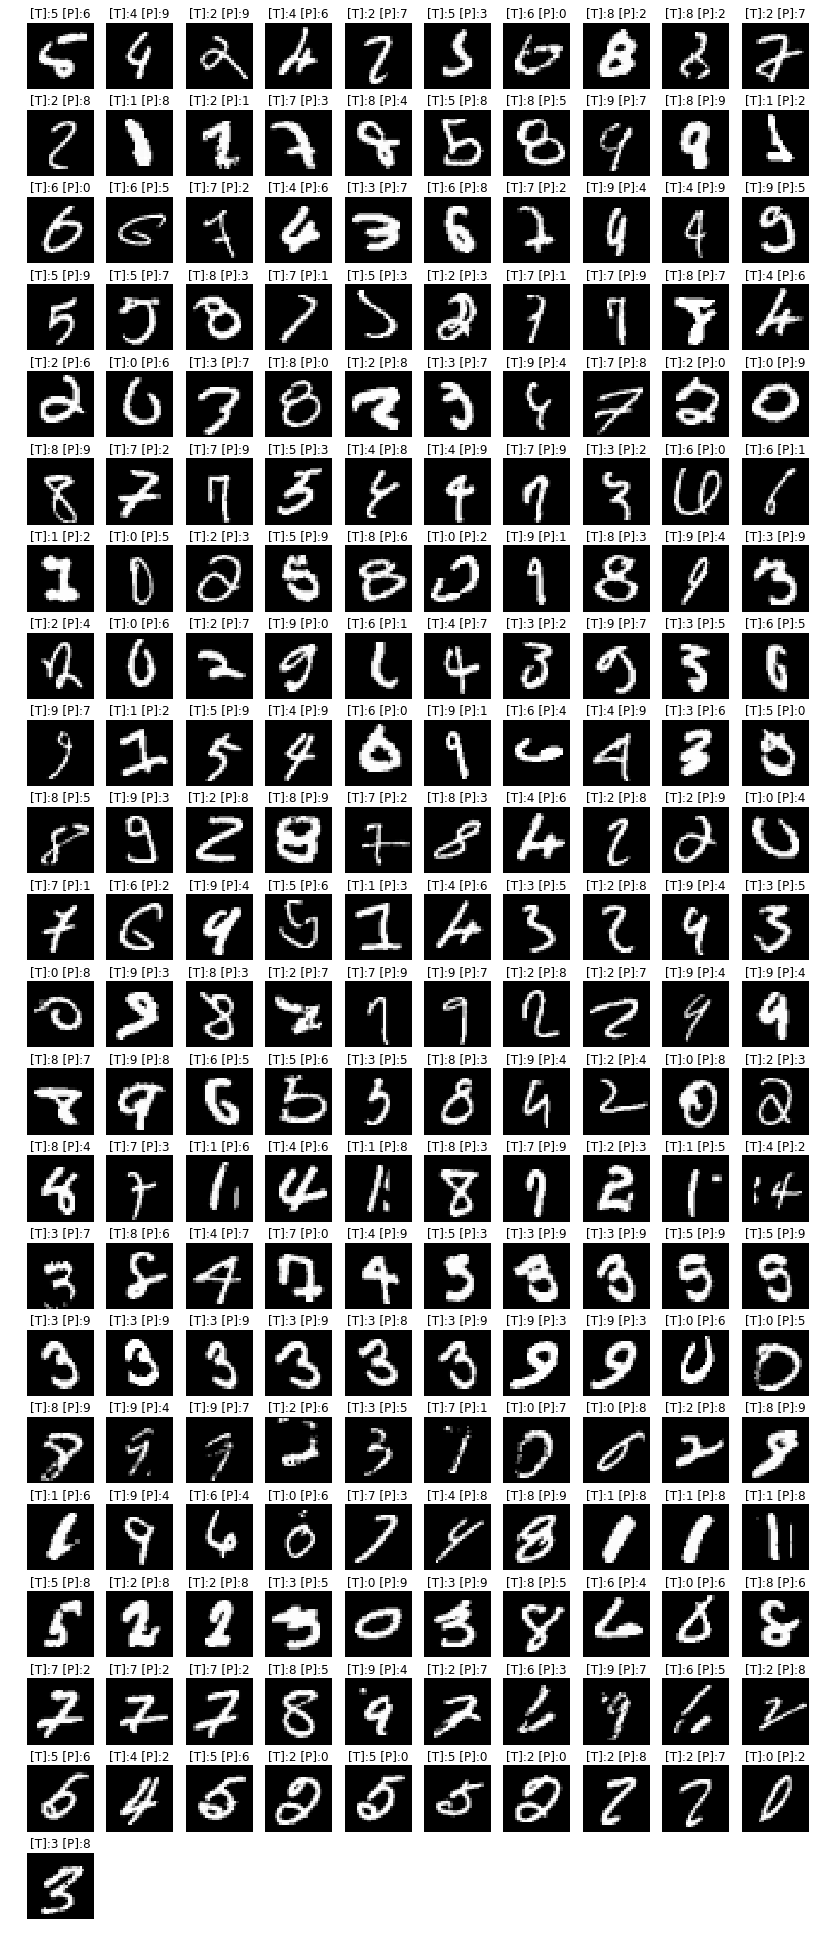

In [63]:
pre_false = []
ans_false = []
img_false = []
for (index, p) in enumerate(pre):
    if not p == y_test[index]:
        pre_false.append(p)
        ans_false.append(y_test[index])
        img_false.append(x_test[index])
        
width = 10
height = int(len(pre_false) / width) + 1
plt.figure(figsize=(14, 35))
for (index, img) in enumerate(img_false):
    plt.subplot(height, width, index + 1)
    # T原始答案　P預測答案
    t = "[T]:" + str(ans_false[index]) + " [P]:" + str(pre_false[index])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")